## Chess Carnage ML Models Discussion

### Models Used

#### Linear Regression

This is the simplest model used supervised learning algorithm for regression tasks. It works by mapping one or more independent variables (features) to a dependent variable (target) with a linear equation. This models tries to find the best-fit line for two dimensions, or plane in higher dimensions, between the features and the data. A loss function is used to minimize the error between predicted and actual values. The Mean Square Error is generally used for the loss function.
The Linear Regression model is relatively simple to implement and efficient for small datasets. The model is also easy to understand as the coefficients of linear equation correlates to the impact of the features on the target. However, it is quite complicated to learn complex datasets with non-linear relationships between the features.

#### Decision Tree Regression

This is a supervised learning algorithm that works by splitting the dataset into subsets based on the features that minimize the error in predicting the target. The splits can be visualized as a tree-like structure, where the leaf nodes are that target variable values. During learning, the algorithm selects a split point of the target samples that would minimize the loss. This is done recursively until a certain depth is reached. The value of the leaf nodes is the mean of all the samples that fall into that node during the during the split at its parent node. 
This model is good at capturing non-linear relationships and it easy to visualize and understand. However, overfitting can happen if the tree is too deep, and small changes to the dataset can make drastic changes to the resulting tree.

#### Random Forest Regression

This is a supervised learning algorithm that uses a group of decision trees to predict a continuous target variable. The model consists of multiple trees trained on different subsets of the training data - hence the name 'Random Forest'. During inference,
each tree predicts the target variable and the results are averaged for the final output. The number of trees in the model can be increased for better performance at the cost of inference time.
Random Forest Regression models can be used to capture non-linear relationships between features more effectively. The averaging of the results of individual trees in the forest reduces overfitting and improves generalization. However, overfitting may occur if the trees are not properly constrained, i.e. too deep. 

#### Support Vector Regression

This is a supervised learning algorithm derived from Support Vector Machines. Rather than minimizing the error directly, it tries to create a function that stays within a selected margin of tolerance with the target values. Predictions within the margin of tolerance are considered acceptable.
This model can effectively capture complex patterns with non-linear relationships, and it performs well in high-dimensional spaces. However, the performance is heavily dependent on the selected margin of tolerance. Training SVR models on large datasets can be time-consuming.

### Results and Performance

The models were added to the Board Flipper Chess bot and tournaments were run against the Random Chess bot.
The tournament time parameters were set as 60s for the Initial Time and 10s for the Increment per move. 
The following table shows the results of the tournament along with the model performance measures during training.
The evaluation of the same FEN by the Stockfish engine has been added for reference. Full tournament results can be found in the `tournament_results` directory.

| Model                     | Random Chess Bot Wins | Board Flipper Chess Bot Wins | Tied Games | Total Moves | Tournament Time (minutes) | Mean Squared Error (MSE) | FEN Evaluation Score |
|---------------------------|------------------------|-------------------------------|------------|-------------|----------------------------|---------------------------|-----------------------|
| Linear Regression         | 0                      | 4                             | 6          | 831         | 40.45                     | 3970.57                   | 22.0                 |
| Decision Tree             | 0                      | 0                             | 10         | 2519        | 100.47                    | 172.03                    | 32.07                |
| Random Forest             | 10                     | 0                             | 0          | 10          | 16.37                     | 4659.59                   | 27.21                |
| Support Vector Regression | 1                      | 2                             | 7          | 973         | 41.23                     | 2063.76                   | 30.56                |
| Stockfish Engine     |                       |                   |            |                               |                           |                          | 28                      |



#### Data Comparisons and Visualizations

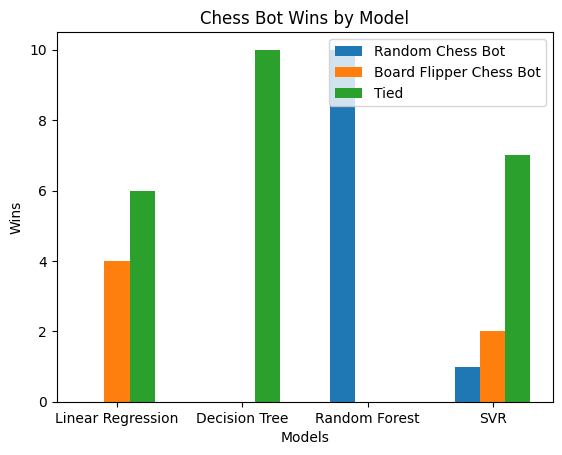

In [28]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
random_bot_wins = [0, 0, 10, 1]
flipper_bot_wins = [4, 0, 0, 2]
tied = [6, 10, 0, 7]

x = np.arange(len(models))
width = 0.2

plt.bar(x - width, random_bot_wins, width, label='Random Chess Bot')
plt.bar(x, flipper_bot_wins, width, label='Board Flipper Chess Bot')
plt.bar(x + width, tied, width, label='Tied')

plt.xlabel('Models')
plt.ylabel('Wins')
plt.title('Chess Bot Wins by Model')
plt.xticks(x, models)
plt.legend()
plt.show()


The above bar chart shows how the trained models fared against the Random Chess bot in a series of games. According to the chart, the Linear Regression model has had the most success beating the random bot. The second best performance is show by the SVR model barely beating the random bot. All the games with the Decision Tree model have been tied, which could mean that the predictions of this model are as random as those moves generated by the random bot. The Random Forest model have lost all the games. The reason for the failure is yet to be found.

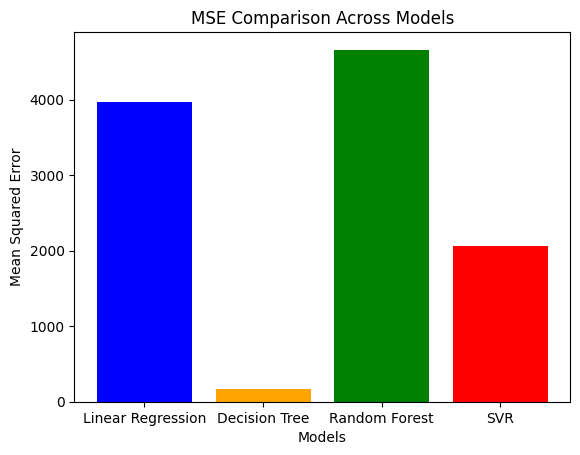

In [38]:
mse = [3970.57, 172.03, 4659.59, 2063.76]

# Plot
plt.bar(models, mse, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison Across Models')
plt.show()

According to the MSE comparison across models, the lowest error has been shown by the Decision Tree model. However, the previous Wins comparison showed that the Decision tree model has not managed to win any game and all games were tied with the random bot. This could mean that the Decision Tree model is not generalizing well, and that is it heavily overfitted on the training data. 
The MSE values of the others show relatively higher values, which could mean that they are generalizing well or predictions show high deviations. In the previous Wins by Model evaluation, it was observed that only the Linear Regression model showed some capability in beating the Random bot. Hence, it can be assumed that the other models are erroneous or overfitting.

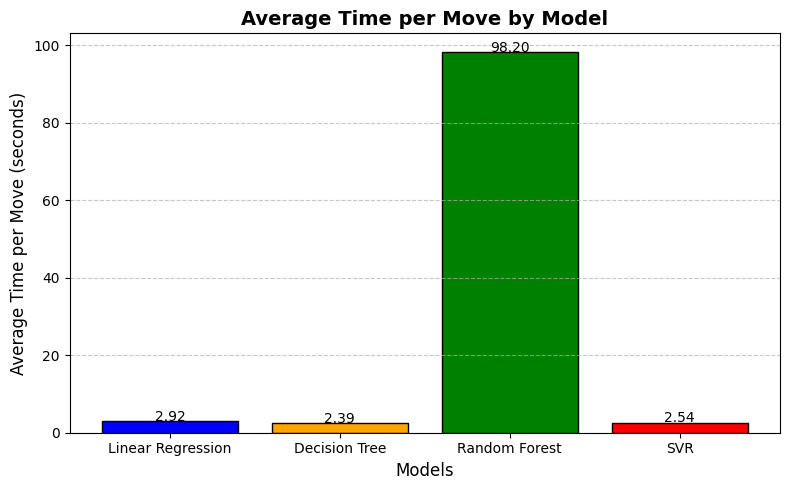

In [36]:
total_moves = [831, 2519, 10, 973]
tournament_time_minutes = [40*60 + 27, 100*60 + 28, 16*60 + 22, 41*60 + 14]

average_time_per_move = [time / moves for time, moves in zip(tournament_time_minutes, total_moves)]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, average_time_per_move, color=['blue', 'orange', 'green', 'red'], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', fontsize=10)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Average Time per Move (seconds)', fontsize=12)
plt.title('Average Time per Move by Model', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


The above bar graph shows the average time taken per move by each model to complete a 10-round tournament with the random bot. The Random Forest shows a very high time taken per move which means that the inference time of trained model is very high. This may be due to a high number of estimators in the forest of trees. As previously observed, the Random Forest bot lost all the games. This means that the Random bot only won by move timeout due to the excessive time taken by the Random Forest bot to make a move.

The Decision Tree model has lowest average time per move. The games were the fastest, the model showed the lowest error estimation, but all the games were tied. Hence, it could be concluded Decision Tree model also behaves similar to the Random Chess bot. The model has been heavily overfitted.

The Linear Regression and SVR models have relatively good time measurements. These are the only models that show any capability is making somewhat good, generalized predictions.

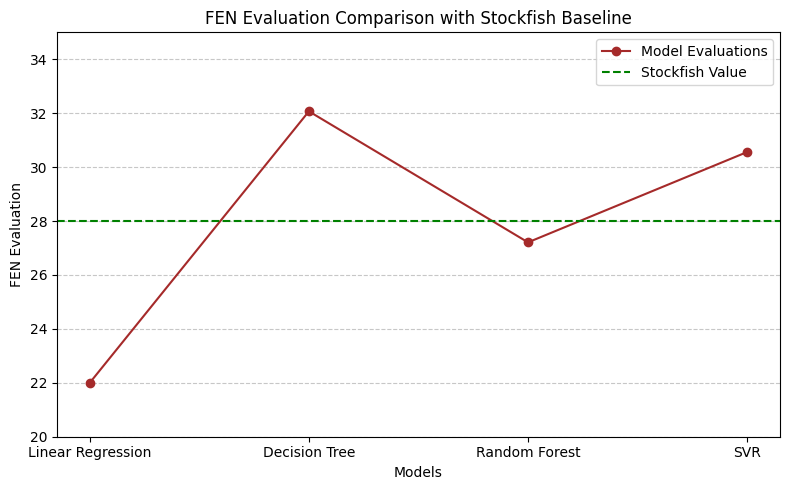

In [34]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']

fen_eval = [22.0, 32.07, 27.21, 30.56]
stockfish_value = 28

plt.figure(figsize=(8, 5))
plt.plot(models, fen_eval, marker='o', label='Model Evaluations', color='brown', linestyle='-')
plt.axhline(y=stockfish_value, color='green', linestyle='--', label='Stockfish Value')

# Customization
plt.xlabel('Models')
plt.ylabel('FEN Evaluation')
plt.title('FEN Evaluation Comparison with Stockfish Baseline')
plt.legend()
plt.ylim(20, 35)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The above graph shows the deviation of the predictions of the models from the original evaluation made by the Stockfish engine for a sample FEN.

#### Model Paths

The models (.pkl files) can be found in the root directory of this repo. 

1. Linear Regression - `chess-carnage-linear.pkl`
2. Decision Tree Regressor - `chess-carnage-dt.pkl`
3. Random Forest Regressor - `chess-carnage-rf.pkl`
4. Support Vector Regressor - `chess-carnage-svr.pkl`

## Reflection

1. In my previous experience with ML models, Decision Tree, Random Forest models and Support Vector Machines were mainly used for classification tasks. In this assignment I learned how these models can be used in regression tasks. It was challenging to create a proper dataset in a sequential format as a large volume of data was required from the Stockfish engine which was slow.

2. To address this issue, the forced mate evaluation values can be replaced by large significant values that would indicate an impending win or a loss. The absolute value of the evaluation should increase as the number of moves to mate decreases. For example, Mate(+2) can be assigned +500 and Mate(+1) can be assigned +1000. Similarly, negative values should be assigned if the current is in a losing situation. This mapping ensures that a large positive score indicates a winning position for the current player and large negative scores if the player is losing.

3. Limiting by depth ensures that the accuracy of the evaluation is consistent for all data samples as all evaluations will be generated by traversing the game tree down to a fixed depth. Limiting by time would lead to inconsistent evaluations as processing some nodes in the game tree may take longer than the others, leading to evaluations being made at random depths. As this is a scenario where data is being generated to train a model, limiting by depth is better as consistency in evaluation accuracy is required. If the chess was used in a game or tournament, limiting by time could be better to ensure that the bot functions within the tournament time constraints and does not time out.

4. Training the model of actual games played strong bots could improve the performance. Games played by strong bots will feature more realistic positions where the moves made will provide lot more meaning than simply calculating a best move for a random board state. The game data will feature a series of moves which could be used to incorporate temporal data, i.e. how the board got to a particular state and where it could go after that, into the model. This would also mean that the variety in the dataset will be less as the strong bots will tend to follow a limited set of strategies. This could lead to overfitting of the model. 

5.  Stockfish functions by analysing all possible outcomes using a game tree to foresee board states that are dozens of move away and selecting the best move. In my opinion, humans are incapable of beating Stockfish as it would require an immense memory and ability to foresee 20-30 moves down the stretch to be able to function like Stockfish and beat it.  